[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alessandronascimento/BioMolComp/blob/main/P03/MSA2.ipynb)

#Alinhamento Múltiplo de Sequências (MSA)#

O alinhamento múltiplo de sequências é uma importante ferramenta para a caracterização de regiões conservadas em proteínas de uma família. Este tipo de alinhamento permite a comparação simultânea de sequências fazendo com que a predição de conservação de resíduos seja muito mais confiável. Além disso, o alinhamento múltiplo permite realização de analises filogenéticas de famílias de proteínas (assunto a ser abordado na próxima aula) que fornece informações sobre sua evolução.


##1. Alinhamento de Domínios



In [ ]:
#@title Preparando o Ambiente para a Execução

# Installing Biopython and importing required libraries...

!pip3 install biopython
from Bio import SeqIO
from Bio.Align.Applications import ClustalwCommandline
from google.colab import files
import os

# Gettting ClustalW2....

!wget http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!tar -xzf clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!mv clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 .



### Upload das Sequências que Serão Alinhadas

Na atividade anterior conseguimos alinhar as regiões conservadas de varias proteínas utilizando a sequências completa destas proteínas. Entretanto isso nem sempre é possível, principalmente quando alinhamos sequências de diferentes tamanhos e com pequenas regiões de conservação. Nestes casos é preferível alinhar somente o domínio de interesse ao invés das sequências completa. 

Nesta atividade iremos analisar um destes casos, onde possuímos varias sequências com um domínio comum. Neste caso considere que um bom alinhamento vá gerar os seguintes três motivos conservados em todas as sequências: **YRP**; **FADD**; **(Y/I)LG**.

O arquivo que usaremos está disponível [aqui](https://raw.githubusercontent.com/alessandronascimento/BioMolComp/main/P03/seqs2.fasta). Clique no link e abra em nova aba para visualizar as sequências.

In [ ]:
seq_file="seqs2.fasta"
!wget https://raw.githubusercontent.com/alessandronascimento/BioMolComp/main/P03/seqs2.fasta
!ls

###Inspecionando as sequências que serão alinhadas

Nesta próxima seção, vamos inspecionar o nosso arquivo fasta, que contem múltiplas sequências. Vamos usar as funções do Biopython (SeqIO) para isto.

Cada sequência é escaneada pela função *SeqIO.parse*. Delas, podemos listar a própria sequência, o cabeçalho (Id) e o número e resíduos na sequência, por exemplo. 

In [ ]:
count=0
for seq_record in SeqIO.parse(seq_file, "fasta"):
    count = count+1
    print("SeqID: %s" % seq_record.id)
    print(repr(seq_record.seq))
    print("Sequence Length: %d" % len(seq_record))
print("")    
print("Number of sequences found: %d" % count);

###Alinhamento das Sequências com o ClustalW

Nesta seção, faremos o alinhamento pelo método progressivo, usando o software *ClustalW*. 

Na seção abaixo, o biopython invoca o clustalw2 (que já baixamos e deixamos na pasta local) e passa o arquivo fasta com as múltiplas sequências como argumento.


In [ ]:
clustalw_exe = r"./clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=seq_file, gapopen=2, gapext=0.1)
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

from Bio import AlignIO
align = AlignIO.read("seqs2.aln", "clustal")
for record in align:
  print("%s - %s" % (record.seq, record.id))

### Analisando as distâncias entre as sequências

Vamos usar o Biopython para analisar o arquivo .dnd pela construção de uma árvore de distâncias.

In [ ]:
from Bio import Phylo
tree = Phylo.read("seqs2.dnd", "newick")
Phylo.draw_ascii(tree)

##Análise do Alinhamento

Examine o alinhamento procurando os motivos nas sequências. Para isto, você pode usar a ferramenta de busca e texto (ctrl+F) e buscar pelos motivos conservados: **YRP**; **FADD**; **(Y/I)LG**.

**Q2. Você consegue ver estes motivos conservados alinhados? Quantas das sequências o programa conseguiu alinhar corretamente? Por que você acha que observou este resultado?**

# Domínios em Proteínas

Uma hipótese que precisamos avaliar neste ponto é a possibilidade de que as proteínas possuam mais de um **domínio** e, talvez, apenas um dos domínios seja conservado entre as quatro sequências protéicas. 

Para checar esta hipótese, vamos submeter uma das sequências à Base de Dados de Domínios Conservados (CDD - *Conserved Domain Database*) do NCBI e ver se identificamos algum domínio conservado em nossa sequência.

Por exemplo, a última sequência do nosso arquivo é esta aqui:


```
>tr|Q24335|Q24335_DROME
MATLRIATWNANGVSQRKLELAQFLHEKHIDVMLLSETHLTSKYNFQIRDYHFYGTNHPD
GKAHGGTAILIRNRMKHHFYKEFAENHLQATSINIQLDDNTLLTLAAVYCPPRFTVLEAQ
FLDFFQALGPHFIAAGDYNAKHTHWGSRLVNPKGKQLYKTIIKATNKLDHVSPGSPTYWP
SDLNKLPDLIDFAVTKNISRSLVKAECLPDLSSDHSPVLIHLRRYAENVKPPTRLTSSKT
NWLRYKKYISSHIELSPKLNTESDIESCTCALQSILTAAALTATPKITNNTINSKKTNVQ
IEQLVHVKRRLRREWQSSRSPTAKQKLKVATRKLANALKQEEDDDQRRYIEQLTPTGTKQ
KSLWRAHSTLRPPTETVLPIKNSSGGWARSDEDRANTFAAHLQNVFTPNQATSTFALPSY
PVNRHQQHTPIVFRPKEITKIIKDNLSPKKSPGYDLITPEMIIQLPHSAVRYITKLFNAI
TKLGYFPQRWKMMKIIMIPKPGKNHTVASSYRPISLLSCISKLFEKCLLIRLNQHQTYHN
IIPAHQFGFRESHGTIEQVNRITTEIRTAFEYREYCTAVFLDVSQAFDKVWLDGLMFKIK
ISLPESTHKLLKSYLYDRKFAVRCNTATSTVHTIEAGVPQGSVLGPTLYLIYTADIPTNS
RLTVSTFADDTAILSRSRSPIQATAQLALYLIDIKKWLSDWRIKVNEQKCKHVTFTLNRQ
DCPPLLLNSIPLPKADEVTYLGVHLDRRLTWRRHIEAKKTQLKLKANNLHWLINSGSPLS
LDHKVLLYNSILKPIWTYGSQLWGNASNSNIDIIQRAQSKILRTITGAPWYVRSENIQRD
LNIPSVTNAITELKEKYL

```

A primeira linha (que começa com ">") é um comentário com informações sobre a sequência. Copie a sequência (sem a primeira linha) e cole no [servidor CDD](https://www.ncbi.nlm.nih.gov/Structure/cdd/wrpsb.cgi). Analise os resultados que o servidor retornam para você.



## Análise - CDD

O CDD deve ter retornado algo similar à figura abaixo. A figura mostra a extensão da nossa sequência (858 aminoácidos). Nesta extensão, dois domínios são identificados:

i) um domínio na região N-terminal, típico da "*Endonuclease/Exonuclease/phosphatase family*". O CDD identifica este domínio na região dos resíduos 7 a 215 da nossa sequência.  A significância desta identificação é muito alta, com um *E-value* de $1.3 \times  10^{-19}$. Ou seja, a probabilidade de se obter esta identificação ao acaso é muito baixa. 

ii) um domínio na região C-termina, típico da "*non-LTR (long terminal repeat) retrotransposon and non-LTR retrovirus reverse transcriptase (RT)*". O CDD identifica este domínio na região dos resíduos 494 a 745 da nossa sequência.  A significância desta identificação é muito alta, com um *E-value* de $6.2 \times  10^{-50}$. Ou seja, a probabilidade de se obter esta identificação ao acaso é muito, muito baixa. 

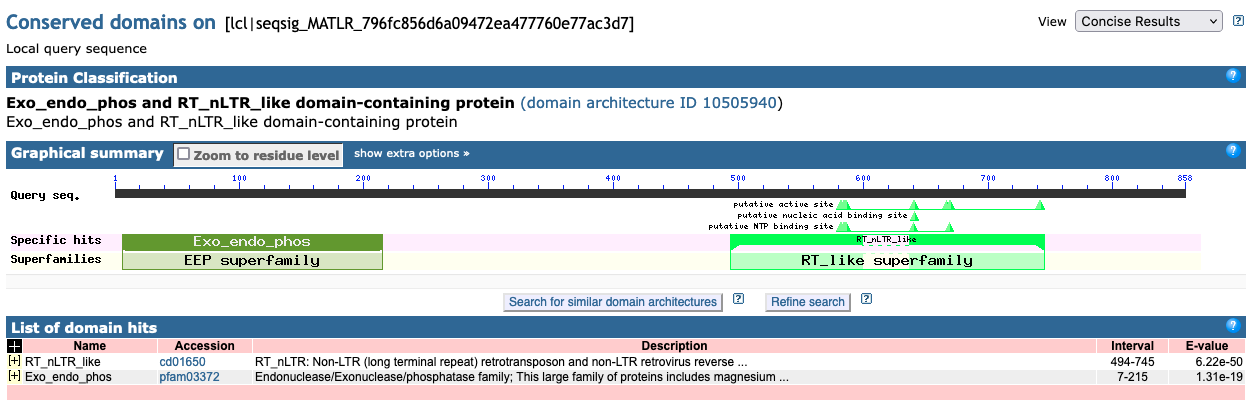

#2. Alinhamento Apenas dos Domínios

Para tentar melhorar o nosso alinhamento, as região contendo apenas os domínios conservados (domínios transcriptase reversa) foi mantida no arquivo de sequências. O novo arquivo de sequências está disponível [aqui](https://raw.githubusercontent.com/alessandronascimento/BioMolComp/main/P03/seqs3.fasta).

Após inspecionar o arquivo, vamos alinhá-lo novamente. 

In [ ]:
# Download do novo arquivo

seq_file="seqs3.fasta"
!wget https://raw.githubusercontent.com/alessandronascimento/BioMolComp/main/P03/seqs3.fasta
!ls


# Inspecao das sequencias

count=0
for seq_record in SeqIO.parse(seq_file, "fasta"):
    count = count+1
    print("SeqID: %s" % seq_record.id)
    print(repr(seq_record.seq))
    print("Sequence Length: %d" % len(seq_record))
print("")    
print("Number of sequences found: %d" % count);

## Alinhamento das Sequências

Veja que estas sequências têm comprimentos (número de resíduos) significativamente menor que as sequências usadas na primeira etapa desta atividade.

Agora vamos alinhar as sequências novamente com o ClustalW e empregando pesos para abertura e extensão de *gap* de 2 e 0.1, respectivamente.

In [ ]:
clustalw_exe = r"./clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=seq_file, gapopen=2, gapext=0.1)
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

from Bio import AlignIO
align = AlignIO.read("seqs3.aln", "clustal")
for record in align:
  print("%s - %s" % (record.seq, record.id))

# Análise do Alinhamento

**Q3: Este arquivo contêm apenas o domínio conservado das mesmas proteínas do arquivo usado anteriormente. Compare com o resultado obtido anteriormente. Como você explica as diferenças observadas?**

## Analisando a Árvore de Distâncias

Só por curiosidade, vamos usar o Biopython para analisar o arquivo .dnd pela construção de uma árvore de distâncias.

In [ ]:
from Bio import Phylo
tree = Phylo.read("seqs3.dnd", "newick")
Phylo.draw_ascii(tree)